# BVP used to solve the TPBVP for a cubic system

In [1]:
%load_ext autoreload
%autoreload 2

from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://www.dropbox.com/s/o48uhuwah8n2xww/basic_material.py?dl=0
%run basic_material

from scipy.integrate import solve_bvp

Running Python: 3.9.9


$$ \ddot y = f(t,y(t)) $$
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html

In [2]:
N = 2000
y0 = 2
tf = 8 # tf fixed here
alpha = -0.5 # how much nonlienaroty
beta = 0.9 # dynamic of approx solution
t = np.linspace(0, tf, N)

In [3]:
def bc(ya, yb):
    return np.array([ya[0] - y0, yb[1] - 0])

def fun(t,x):
    return np.array([alpha*x[0]**3 - x[1], -x[0] - 2*alpha*x[0]**2*x[1]])

In [4]:
y_init = np.zeros((2,N))
y_init[0,:] = [y0 for i in range(N)] 
res = solve_bvp(fun, bc, t, y_init)

v_approx = y0*np.exp(-beta*t)

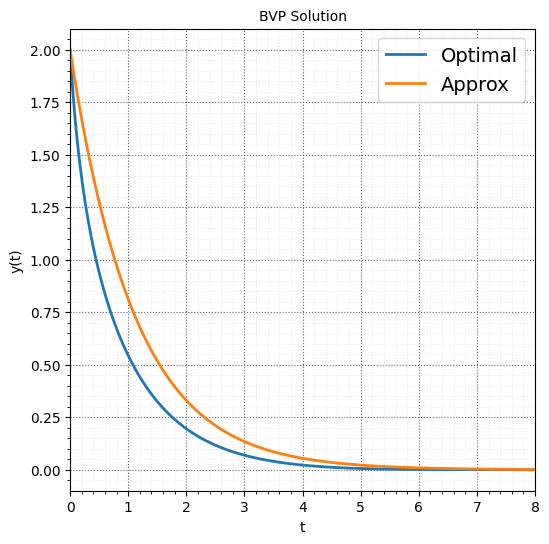

In [5]:
plt.figure(figsize = (6,6))
plt.plot(t, res.y[0,:],label='Optimal')
plt.plot(t, v_approx,label='Approx')
plt.xlabel('t')
plt.legend()
plt.ylabel('y(t)')
plt.legend(fontsize=14)

plt.title('BVP Solution')
plt.xlim([min(t),max(t)])
nicegrid()
plt.savefig("figs/bvp_cubic1.png")
plt.show()

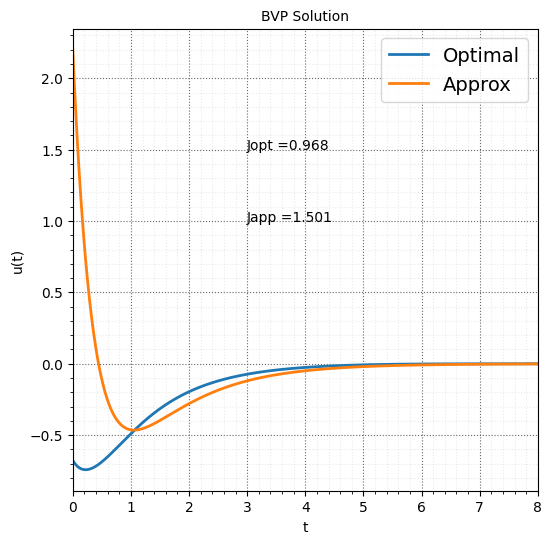

In [6]:
dt = t[1]-t[0]
u_optimal = -res.y[1,:]
u_approx = -alpha*v_approx**3 - beta*v_approx

Integral_optimal = np.sum(res.y[0,:]**2 + u_optimal**2)*dt/2
Integral_approx = np.sum(v_approx**2 + u_approx**2)*dt/2

plt.figure(figsize = (6,6))
plt.plot(t, u_optimal,label='Optimal')
plt.plot(t, u_approx,label='Approx')
plt.legend()
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend(fontsize=14)
plt.text(3,1.5,'Jopt ='+str(round(Integral_optimal,3)))
plt.text(3,1,'Japp ='+str(round(Integral_approx,3)))
plt.title('BVP Solution')
plt.xlim([min(t),max(t)])
nicegrid()
plt.savefig("figs/bvp_cubic2.png")
plt.show()